# **Using pandas read_html to Web Scrape Data for Data Science** 

Tarun Badarvada

<i>[Data Professor YouTube channel](http://youtube.com/dataprofessor), http://youtube.com/dataprofessor </i>

In this Jupyter notebook, I will be showing you how to easily web scrape data using pandas read_html() function for your data science project. We will be web scraping BoxOfficeMojo data and perform a quick data exploration.

## **URL to the webpage "Box Offce Data from Box Office Mojo"**

### Method 1

We could modularize the URL and year strings of text that may be useful for programmatic access (in the subsequent code cell).

In [1]:
# The Building Blocks
url = 'https://www.boxofficemojo.com/weekend/by-year/2016/'

# Combining the URL + year strings together
url

'https://www.boxofficemojo.com/weekend/by-year/2016/'

## **Read HTML webpage into pandas**

In [2]:
import pandas as pd

### Using pd.read_html() function to read HTML webpage

In [3]:
df = pd.read_html(url, header = 0)
df

[                                     Dates  Top 10 Gross    %± LW  \
 0   Dec 30-Jan 2, 2017New Year's long wknd  $220,396,876    -7.3%   
 1                       Dec 30-Jan 1, 2017  $166,381,697    +0.8%   
 2             Dec 23-26Christmas long wknd  $250,611,546   +47.7%   
 3                                Dec 23-25  $165,020,197   -18.9%   
 4                                Dec 16-18  $203,485,726  +184.3%   
 ..                                     ...           ...      ...   
 59                               Jan 22-24   $95,736,903   -34.2%   
 60                       Jan 15-18MLK wknd  $175,297,289   -20.6%   
 61                               Jan 15-17  $145,502,232    +1.8%   
 62                                Jan 8-10  $142,912,699     -28%   
 63                                 Jan 1-3  $198,537,624   -27.3%   
 
    Overall Gross  %± LW.1  Releases  \
 0   $246,770,071   -11.1%        68   
 1   $186,656,052    +2.9%        81   
 2   $274,763,402   +34.1%        67  

### How many tables are there in the webpage?

In [4]:
len(df)

1

### Select the first table

In [5]:
df[0]

,Dates,Top 10 Gross,%± LW,Overall Gross,%± LW.1,Releases,#1 Release,Genre,Budget,Running Time,Week,Long Weekend
0,"Dec 30-Jan 2, 2017New Year's long wknd","$220,396,876",-7.3%,"$246,770,071",-11.1%,68,Rogue One: A Star Wars Story,-,-,-,53,True
1,"Dec 30-Jan 1, 2017","$166,381,697",+0.8%,"$186,656,052",+2.9%,81,Rogue One: A Star Wars Story,-,-,-,53,False
2,Dec 23-26Christmas long wknd,"$250,611,546",+47.7%,"$274,763,402",+34.1%,67,Rogue One: A Star Wars Story,-,-,-,52,True
3,Dec 23-25,"$165,020,197",-18.9%,"$181,350,322",-14.3%,82,Rogue One: A Star Wars Story,-,-,-,52,False
4,Dec 16-18,"$203,485,726",+184.3%,"$211,583,035",+152.7%,99,Rogue One: A Star Wars Story,-,-,-,51,False
...,...,...,...,...,...,...,...,...,...,...,...,...
59,Jan 22-24,"$95,736,903",-34.2%,"$113,596,503",-31.6%,87,The Revenant,-,-,-,4,False
60,Jan 15-18MLK wknd,"$175,297,289",-20.6%,"$200,759,295",-20%,57,Ride Along 2,-,-,-,3,True
61,Jan 15-17,"$145,502,232",+1.8%,"$166,004,623",+4.2%,86,Ride Along 2,-,-,-,3,False
62,Jan 8-10,"$142,912,699",-28%,"$159,323,600",-27.4%,91,Star Wars: Episode VII - The Force Awakens,-,-,-,2,False


In [6]:
df2019 = df[0]

## Data cleaning

We can see that the table header is presented multiple times in several rows.

In [7]:
df2019[df2019.Releases == 'Releases']

,Dates,Top 10 Gross,%± LW,Overall Gross,%± LW.1,Releases,#1 Release,Genre,Budget,Running Time,Week,Long Weekend


In [8]:
df2019.shape

(64, 12)

In [9]:
len(df2019[df2019.Releases == 'Releases'])

0

In [10]:
df = df2019.drop(df2019[df2019.Releases == 'Releases'].index)

In [11]:
df.shape

(64, 12)

## Quick Exploratory Data Analysis

In [12]:
import seaborn as sns

Making the Line Plot of # of Releases during 2022

<AxesSubplot: xlabel='Week', ylabel='Releases'>

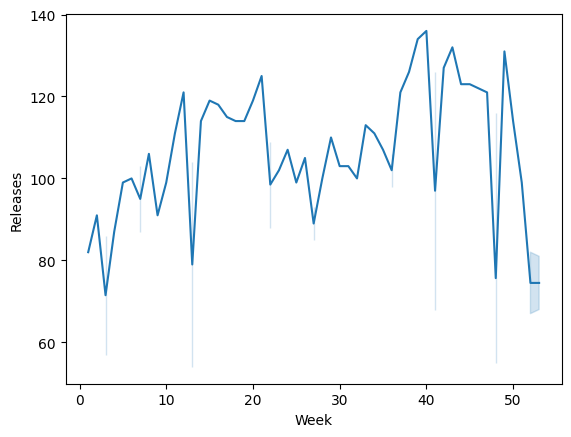

In [13]:
sns.lineplot(data = df2019, x = 'Week', y = 'Releases')

Change bar line color

/var/folders/k5/kq4wgns12dn1k2v1k48nckdc0000gn/T/ipykernel_40260/2523503437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Releases,


<AxesSubplot: xlabel='Releases'>

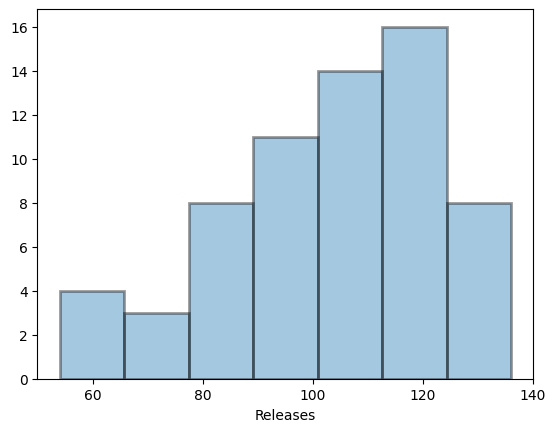

In [14]:
sns.distplot(df.Releases, 
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2))

Change bar fill colors

/var/folders/k5/kq4wgns12dn1k2v1k48nckdc0000gn/T/ipykernel_40260/2567243074.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Releases,


<AxesSubplot: xlabel='Releases'>

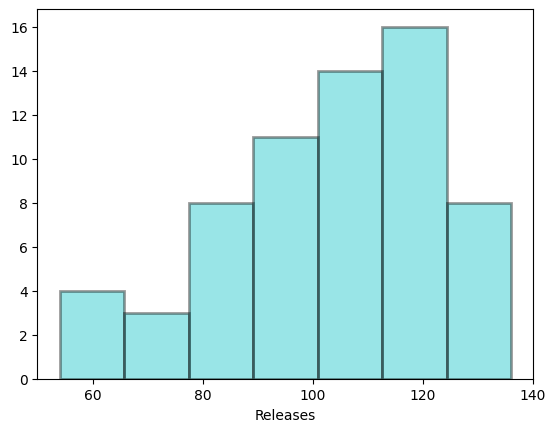

In [15]:
sns.distplot(df.Releases,
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2),
             color='#00BFC4')